In [2]:
# example of pix2pix gan for satellite to map image-to-image translation
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

##.........................

from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D

from keras import backend as K

from keras.utils import multi_gpu_model

##..................
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Multiply

#................
import tensorflow as tf

#................
from keras.utils.vis_utils import plot_model

#................
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [3]:
import numpy as np
from keras.preprocessing import image
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import  tensorflow as tf

from numpy.random import randn
from numpy.random import randint


# from libs.spectral_normalized_layers import Dense_SN,Conv2D_SN,Conv2DTranspose_SN

import sys

import numpy as np

## Attention Mechanism
from keras.layers import Layer,Concatenate
from keras.layers import Add
from keras import backend as K
from keras.engine import *
from keras.utils import multi_gpu_model
from keras import backend
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import AveragePooling2D

In [4]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Input

import numpy as np

In [5]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Input

import numpy as np

In [6]:
import glob

In [7]:
def data_gen():
    
#     trainA = "./mapdata/trainer/source/images"
    
    trainA = "./nyu_data/train/target"
    
    trainA_filenames=glob.glob(trainA+str("/*"))
        
#     for i in range(len(trainA_filenames)):
        
#         trainA_filenames[i]=[trainA_filenames[i])]
        
#     print(trainA_filenames)
        
    return trainA_filenames

In [8]:
import cv2

train_data_generator= data_gen()

In [9]:
def show_batch(image_batch, label_batch):
    image_batch = 0.5 *image_batch + 0.5  
    plt.figure(figsize=(30,30))
    for n in range(4):
        ax = plt.subplot(2,2,n+1)
        plt.imshow(image_batch[n,:,:])
        
        plt.axis('off')

764


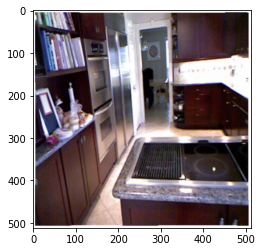

In [10]:
# print(len(train_data_generator))

G=plt.imread(train_data_generator[0])

plt.imshow(G[...,:3])

print(train_data_generator[0][24:-4])

/home/ubuntu/Music/hope/lib/python3.6/site-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


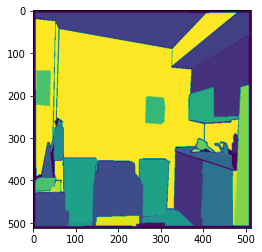

In [11]:
# nyu_rgbd_path = "./labels40.mat"
nyu_rgbd_path = "./nyu_depth_v2_labeled.mat"

from skimage import io
from skimage import color
from skimage import segmentation


# mpimg.imsave("seg_regb.jpg",seg_rgb)

import h5py

from scipy.io import loadmat

# x = loadmat(nyu_rgbd_path)

all_files=h5py.File(nyu_rgbd_path)

image_seg=all_files["labels"][0].transpose(1,0)

# print(image_seg.shape)


# image_seg = all_files[0]

image_seg = cv2.resize(image_seg, (512,512))

plt.imshow(image_seg/895)

# np.max(all_files["labels"])

In [12]:
import math
import cv2

from operator import itemgetter
# select real samples
def generate_real_samples(train_data_gen, n_samples,size=64,patch_shape=16):
    # choose random instances
    
    ix = randint(0, len(train_data_gen), n_samples)
    
    no_of_layers=int(math.log(size)/math.log(2))
    
#     print(no_of_layers)

    all_size_images=[]

  
    for j in range(6,no_of_layers+1):
    
        all_images=[]
#         all_labels=[]
        all_images_Y=[]

        
        
        for i in ix:

            
            Y=plt.imread(train_data_gen[i])
            
            Y=Y/np.max(Y)
            
            Y_k=cv2.resize(Y[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
            all_images_Y.append(Y_k)
            
############################################################################################
            
            X=  all_files["labels"][int(train_data_generator[i][24:-4])-1].transpose(1,0)
                         
                
            X_k=cv2.resize(X, dsize=(2**(j), 2**j))
            
#             X_k=mask2onehot(X_k,41)

            X_k=np.expand_dims(X_k,axis=-1)
    
            X_k=(X_k/894)
            
            all_images.append(X_k)
        
        
        all_images= np.array(all_images)
        
        all_images_Y = np.array(all_images_Y)
    
    
        all_images=(all_images-0.5)*2
        
        all_images_Y=(all_images_Y-0.5)*(2)
        
#         print(all_images.shape)
        
        all_images = [all_images,all_images_Y]
    
        all_size_images.append(all_images)
#     X=X/255
    # generate class labels
    y = np.ones((n_samples,patch_shape,patch_shape, 72))
    return all_size_images, y

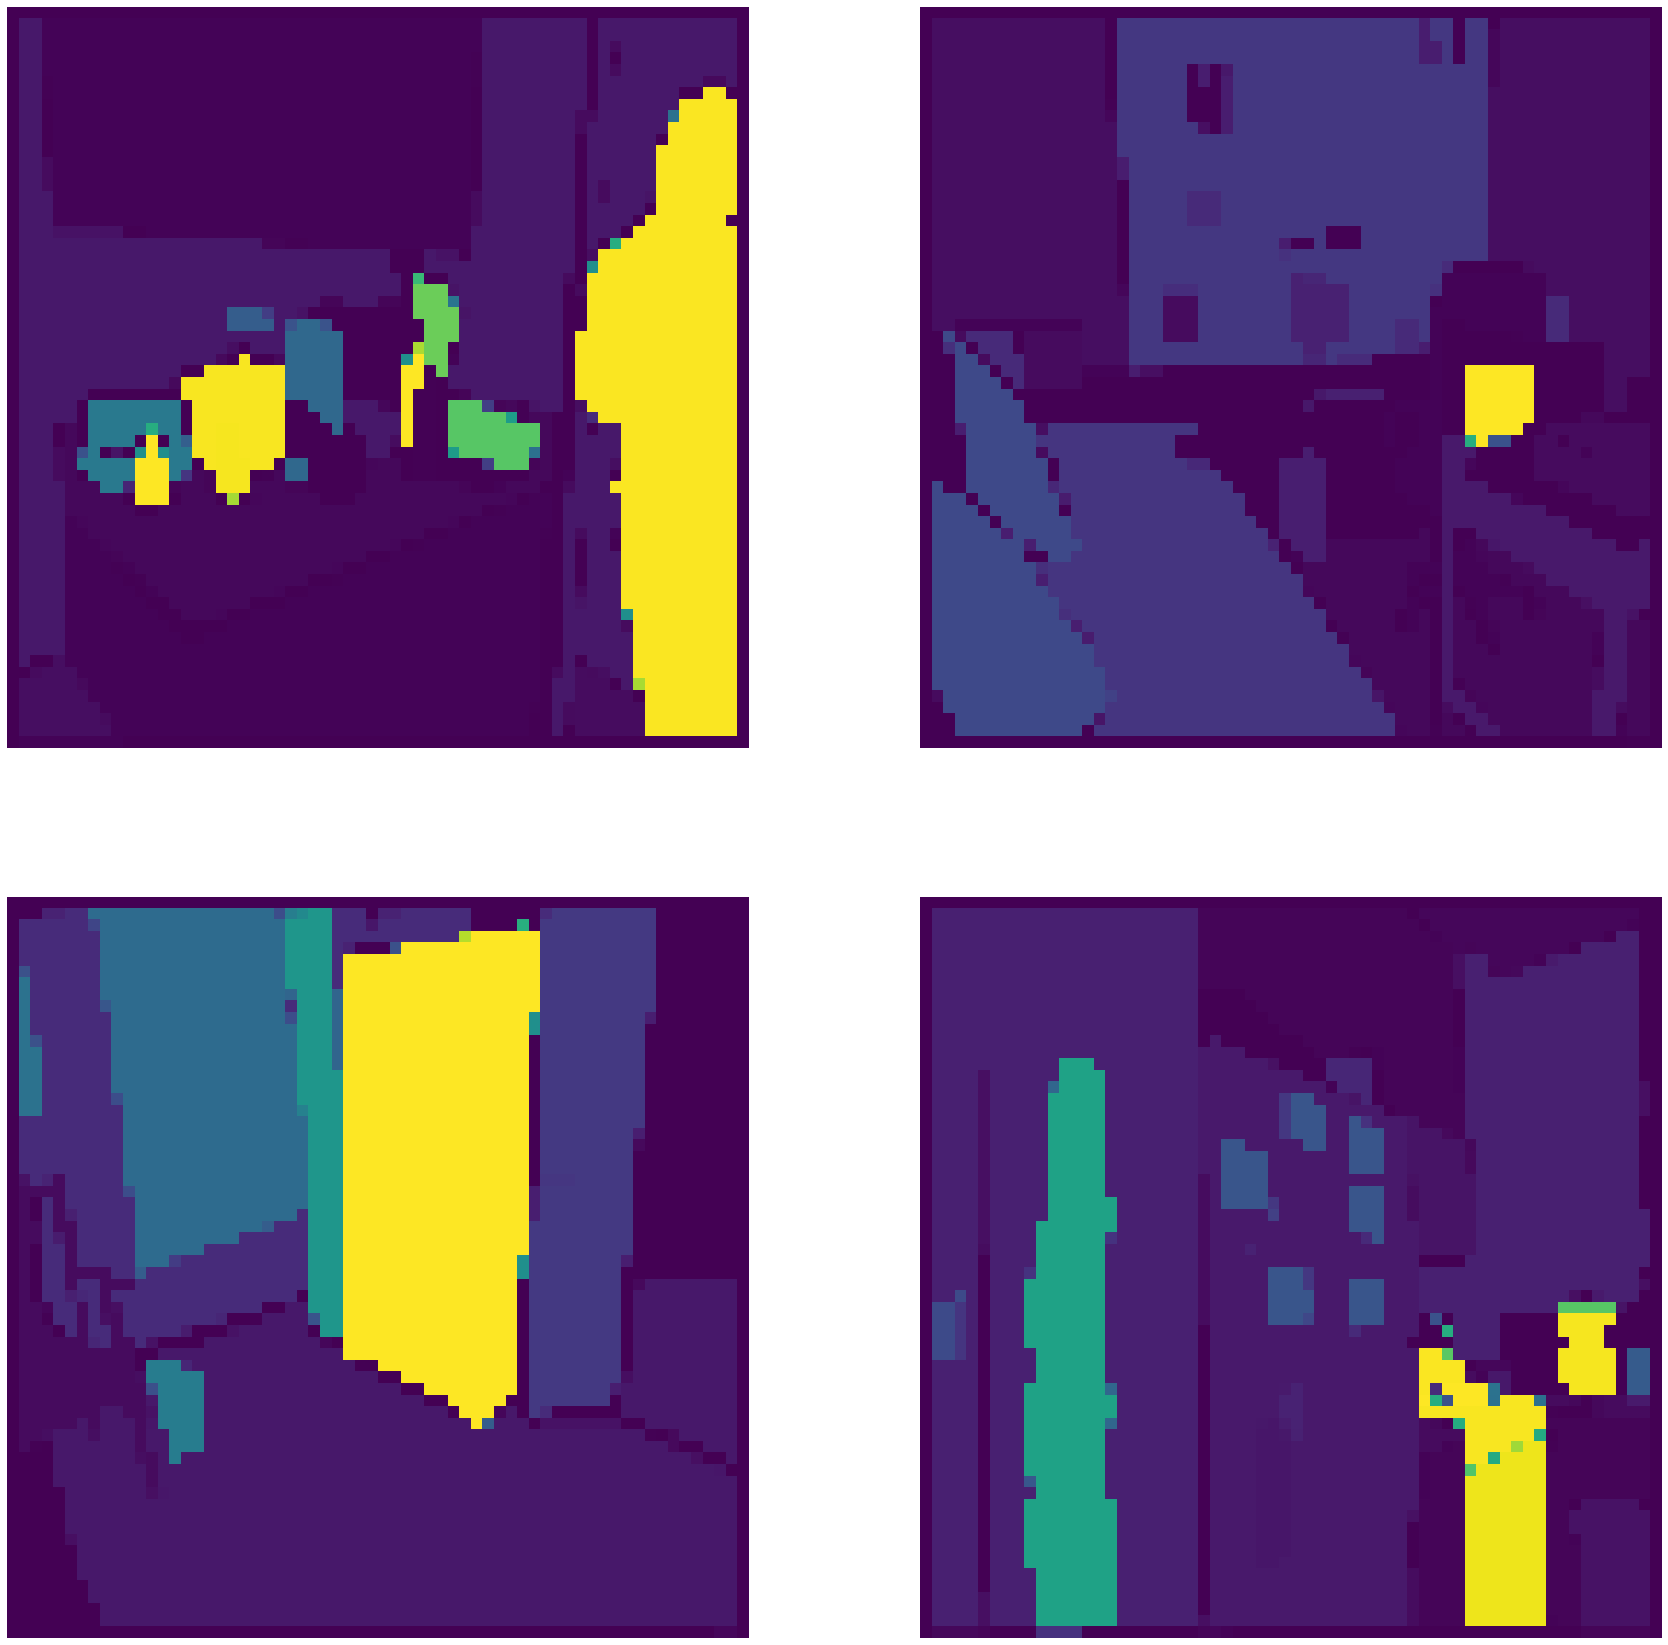

In [13]:
image_batch, label_batch = generate_real_samples(train_data_generator, 4,size=256)


show_batch(image_batch[0][0], label_batch)

# plt.imshow(onehot2mask(image_batch[0][0][0]))

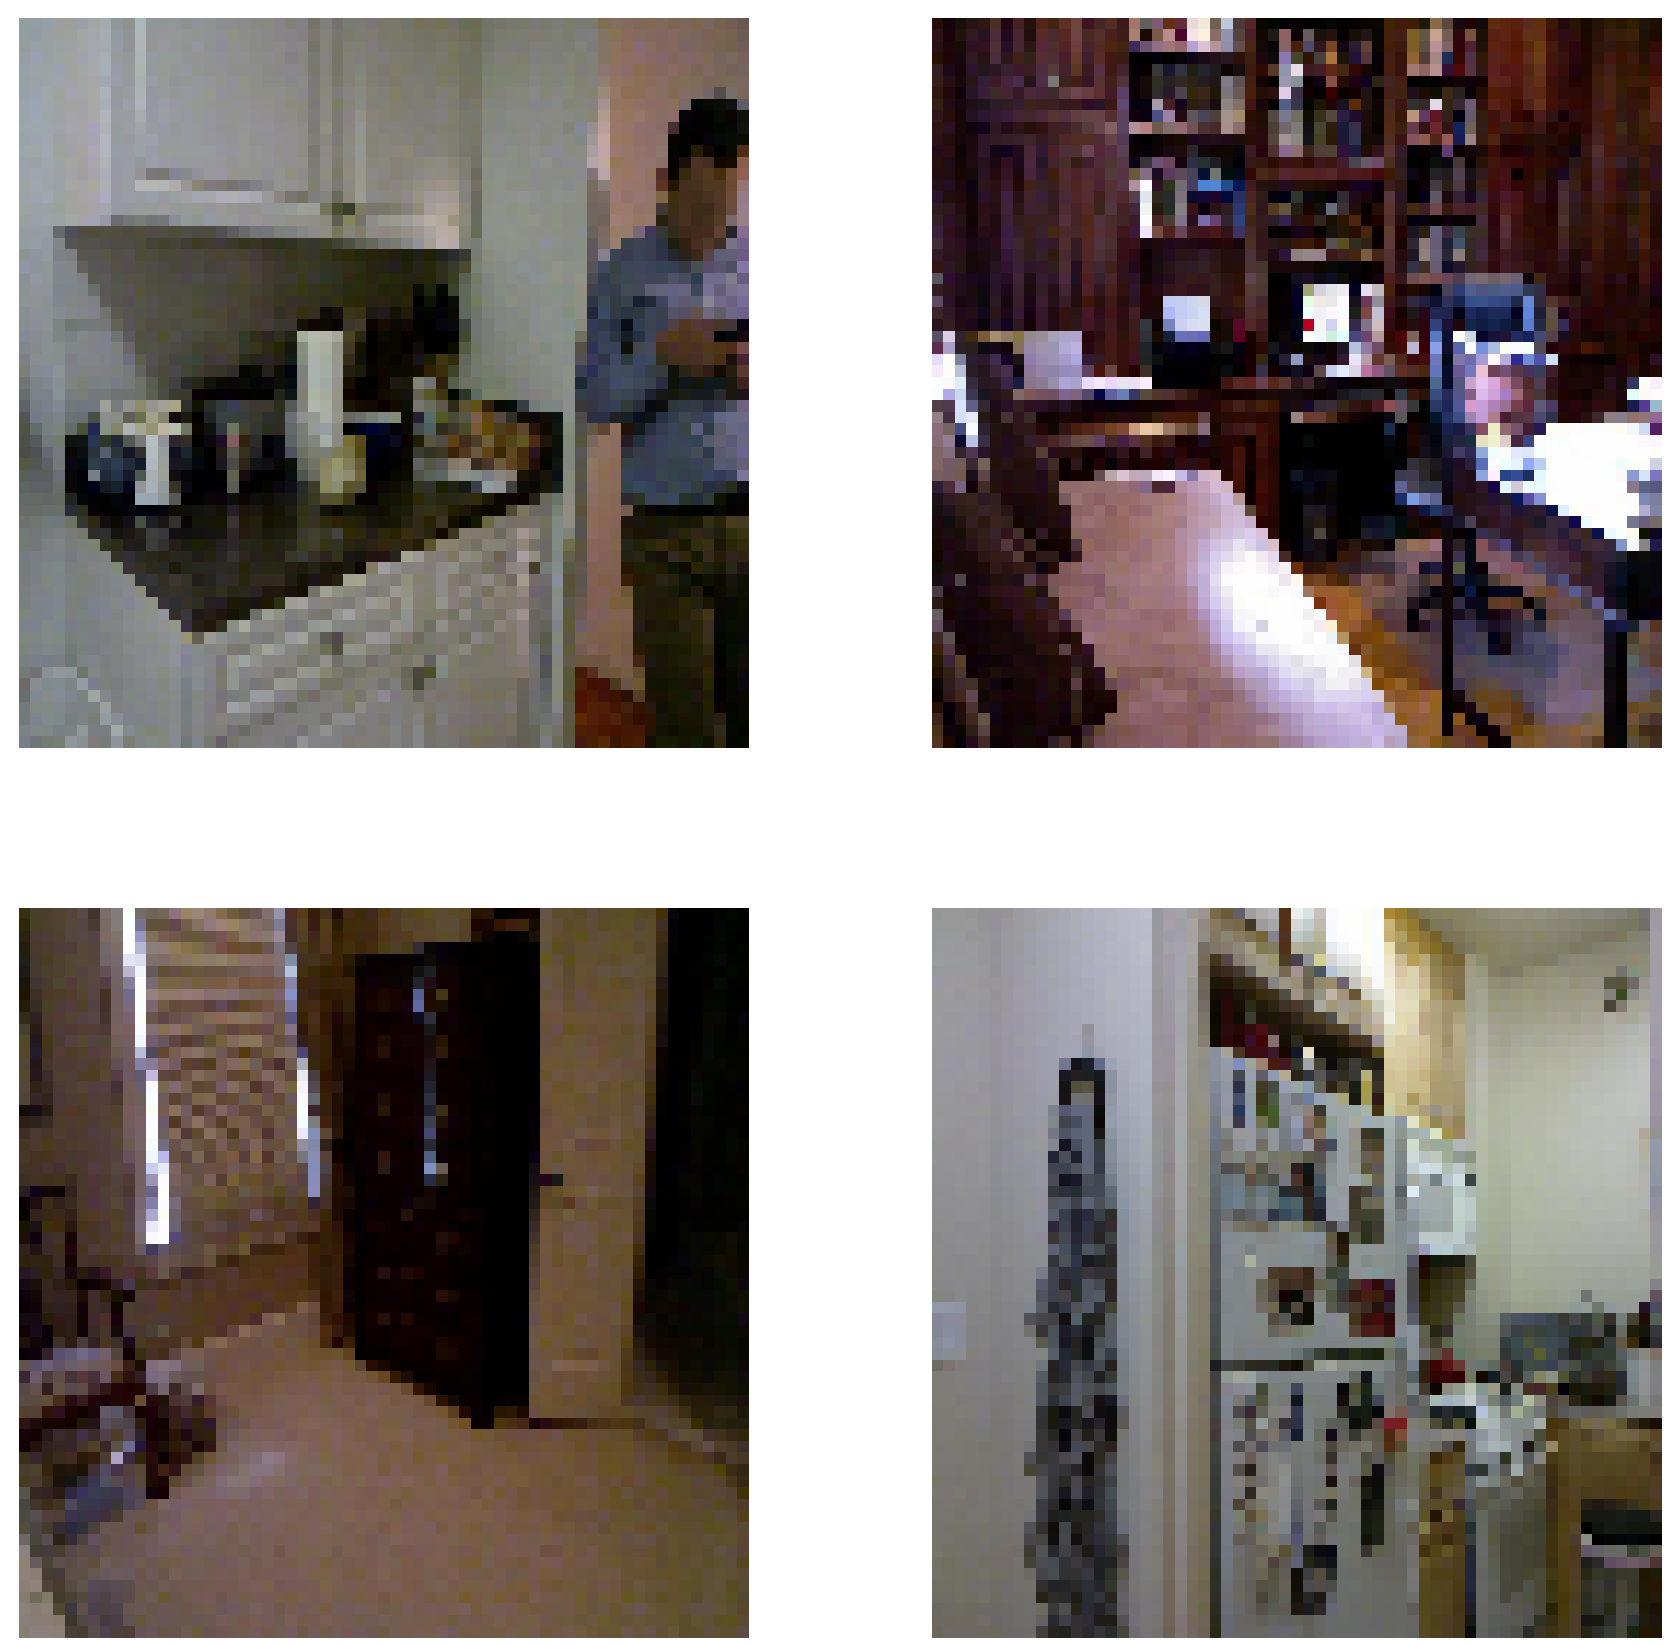

In [14]:
show_batch(image_batch[0][1], label_batch)

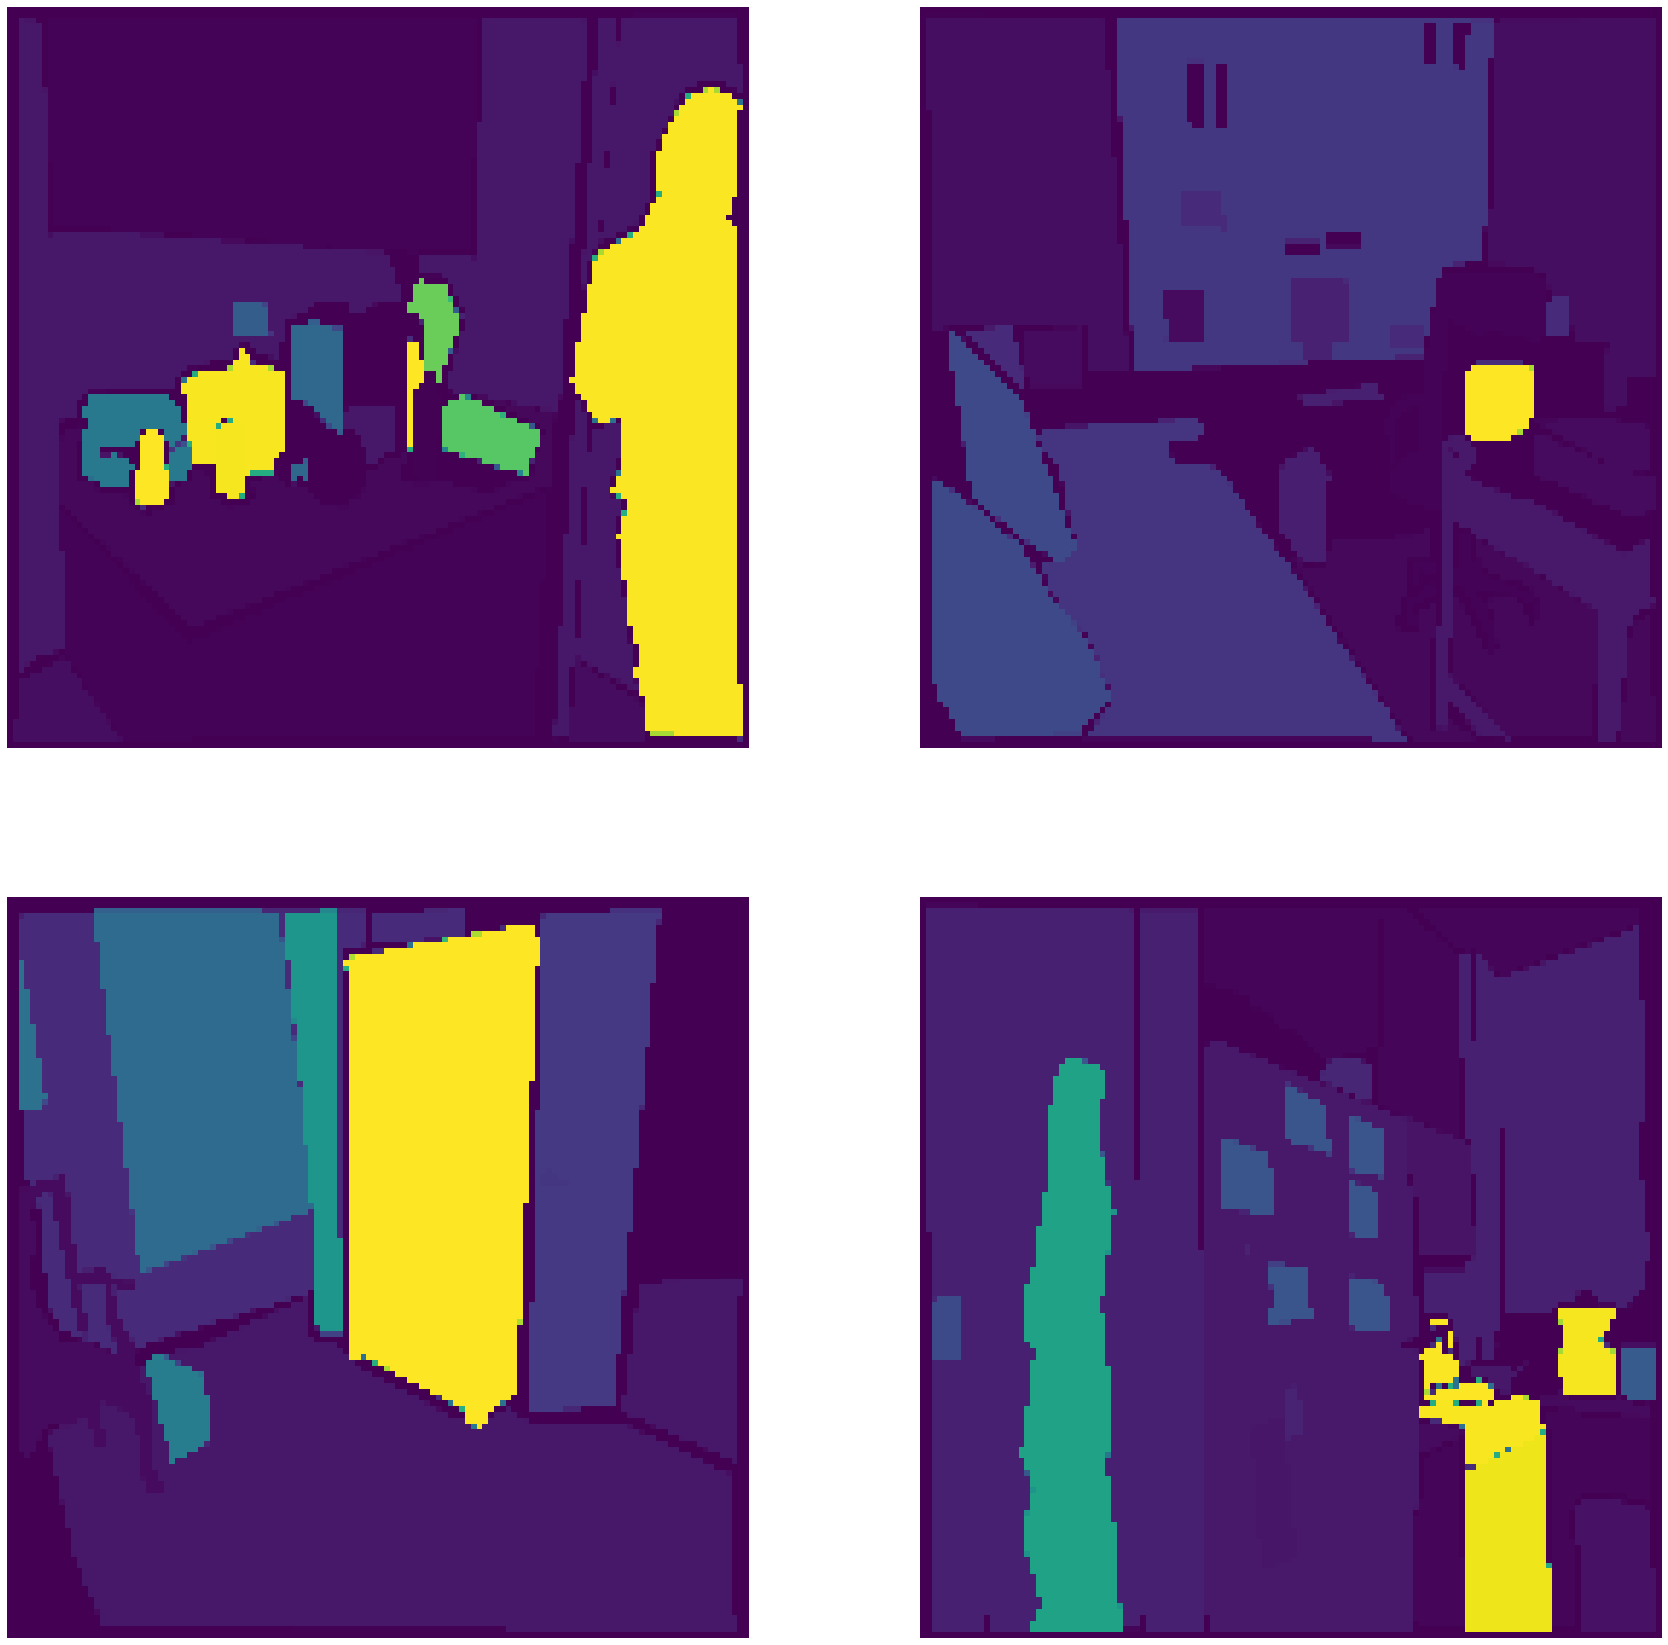

In [15]:
show_batch(image_batch[1][0], label_batch) 

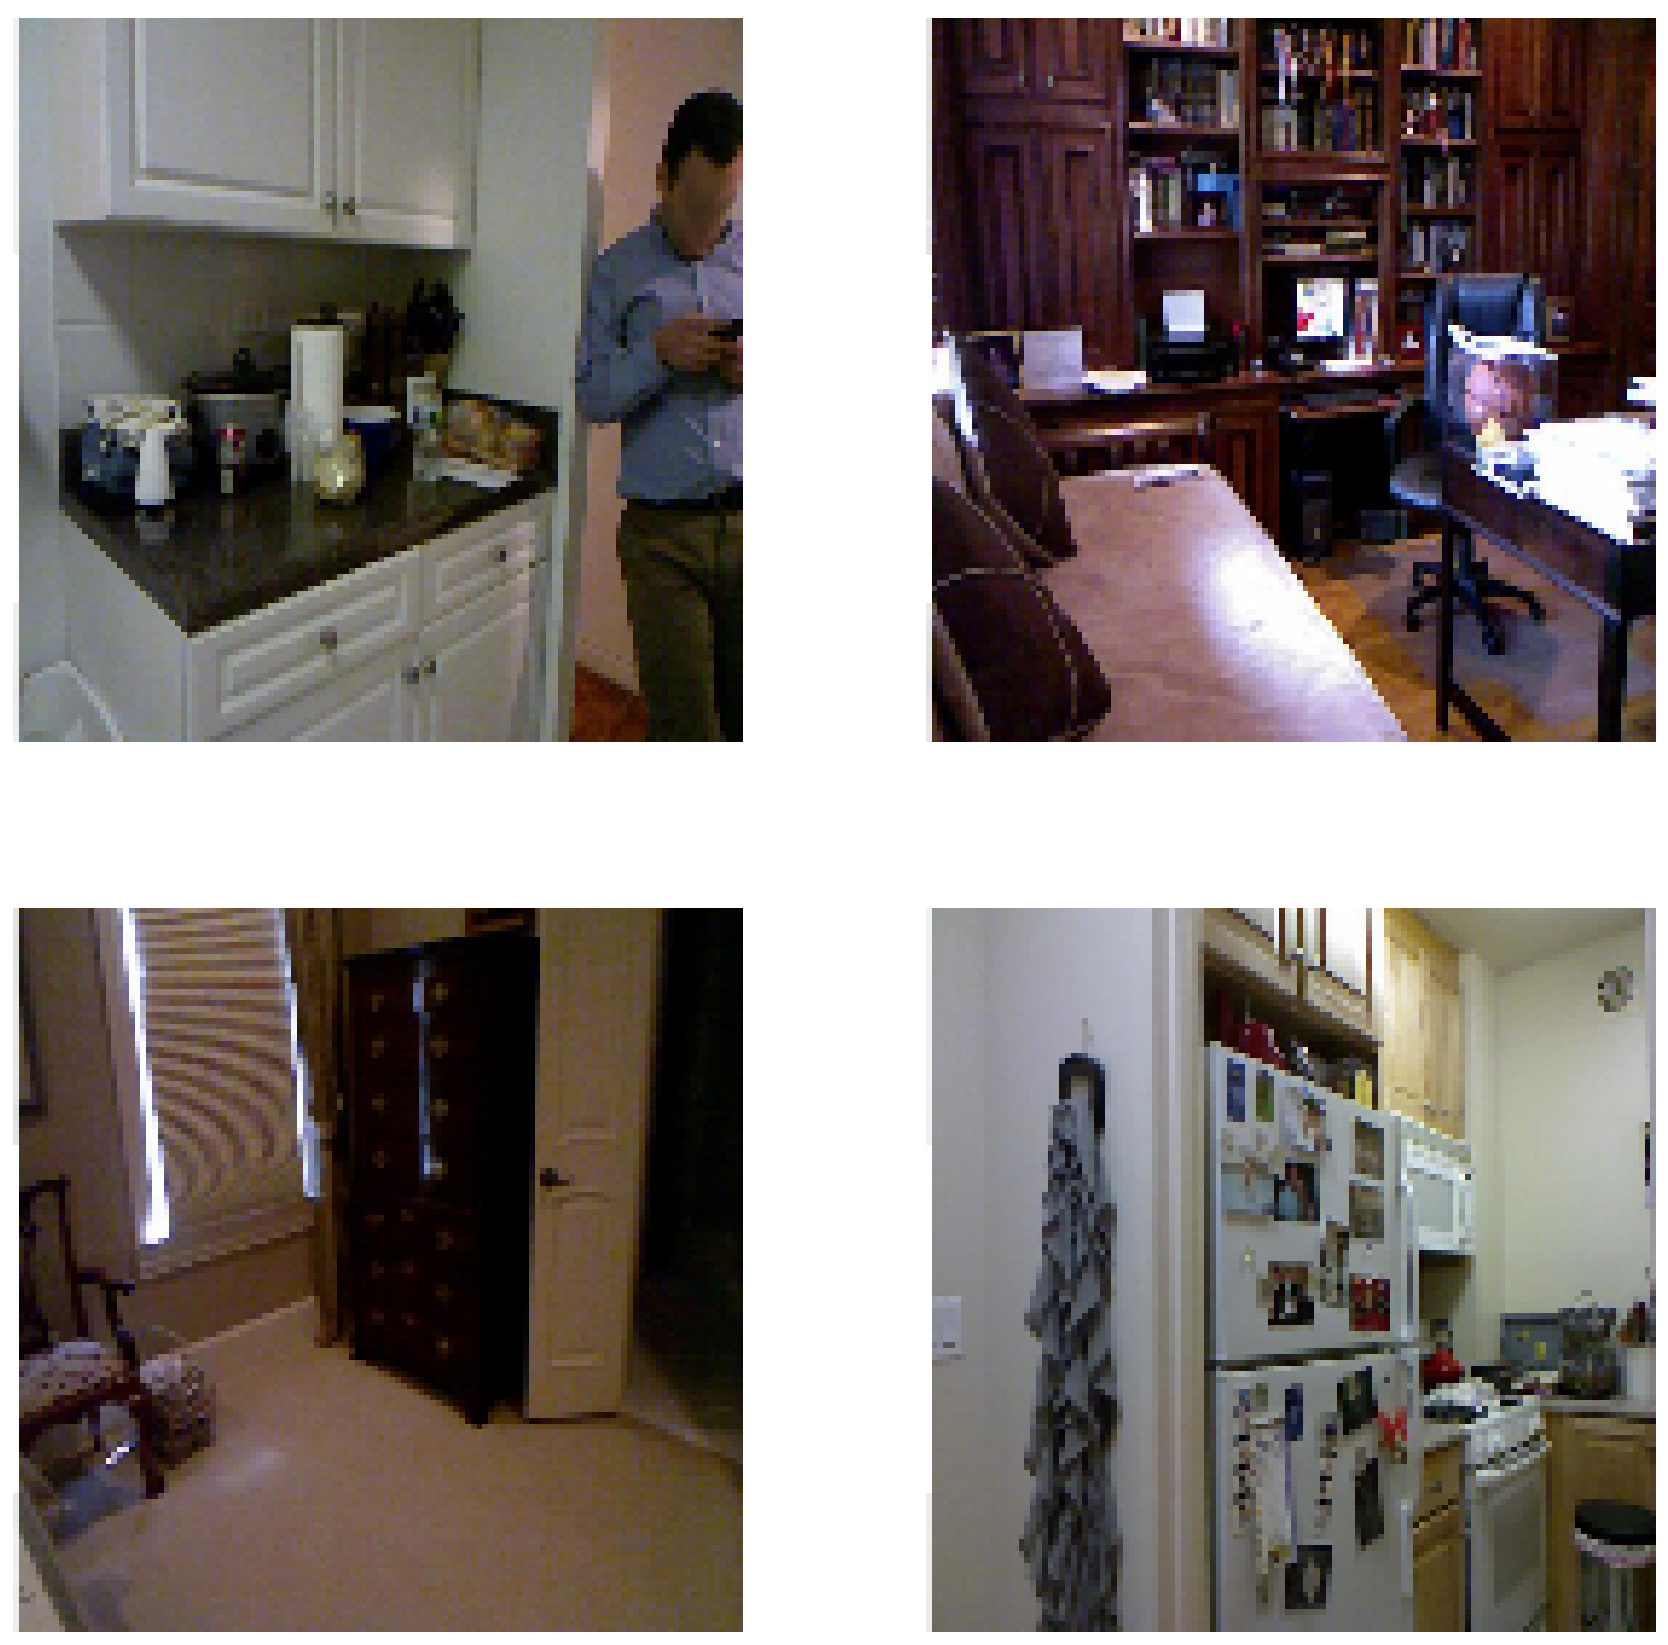

In [16]:
show_batch(image_batch[1][1], label_batch)

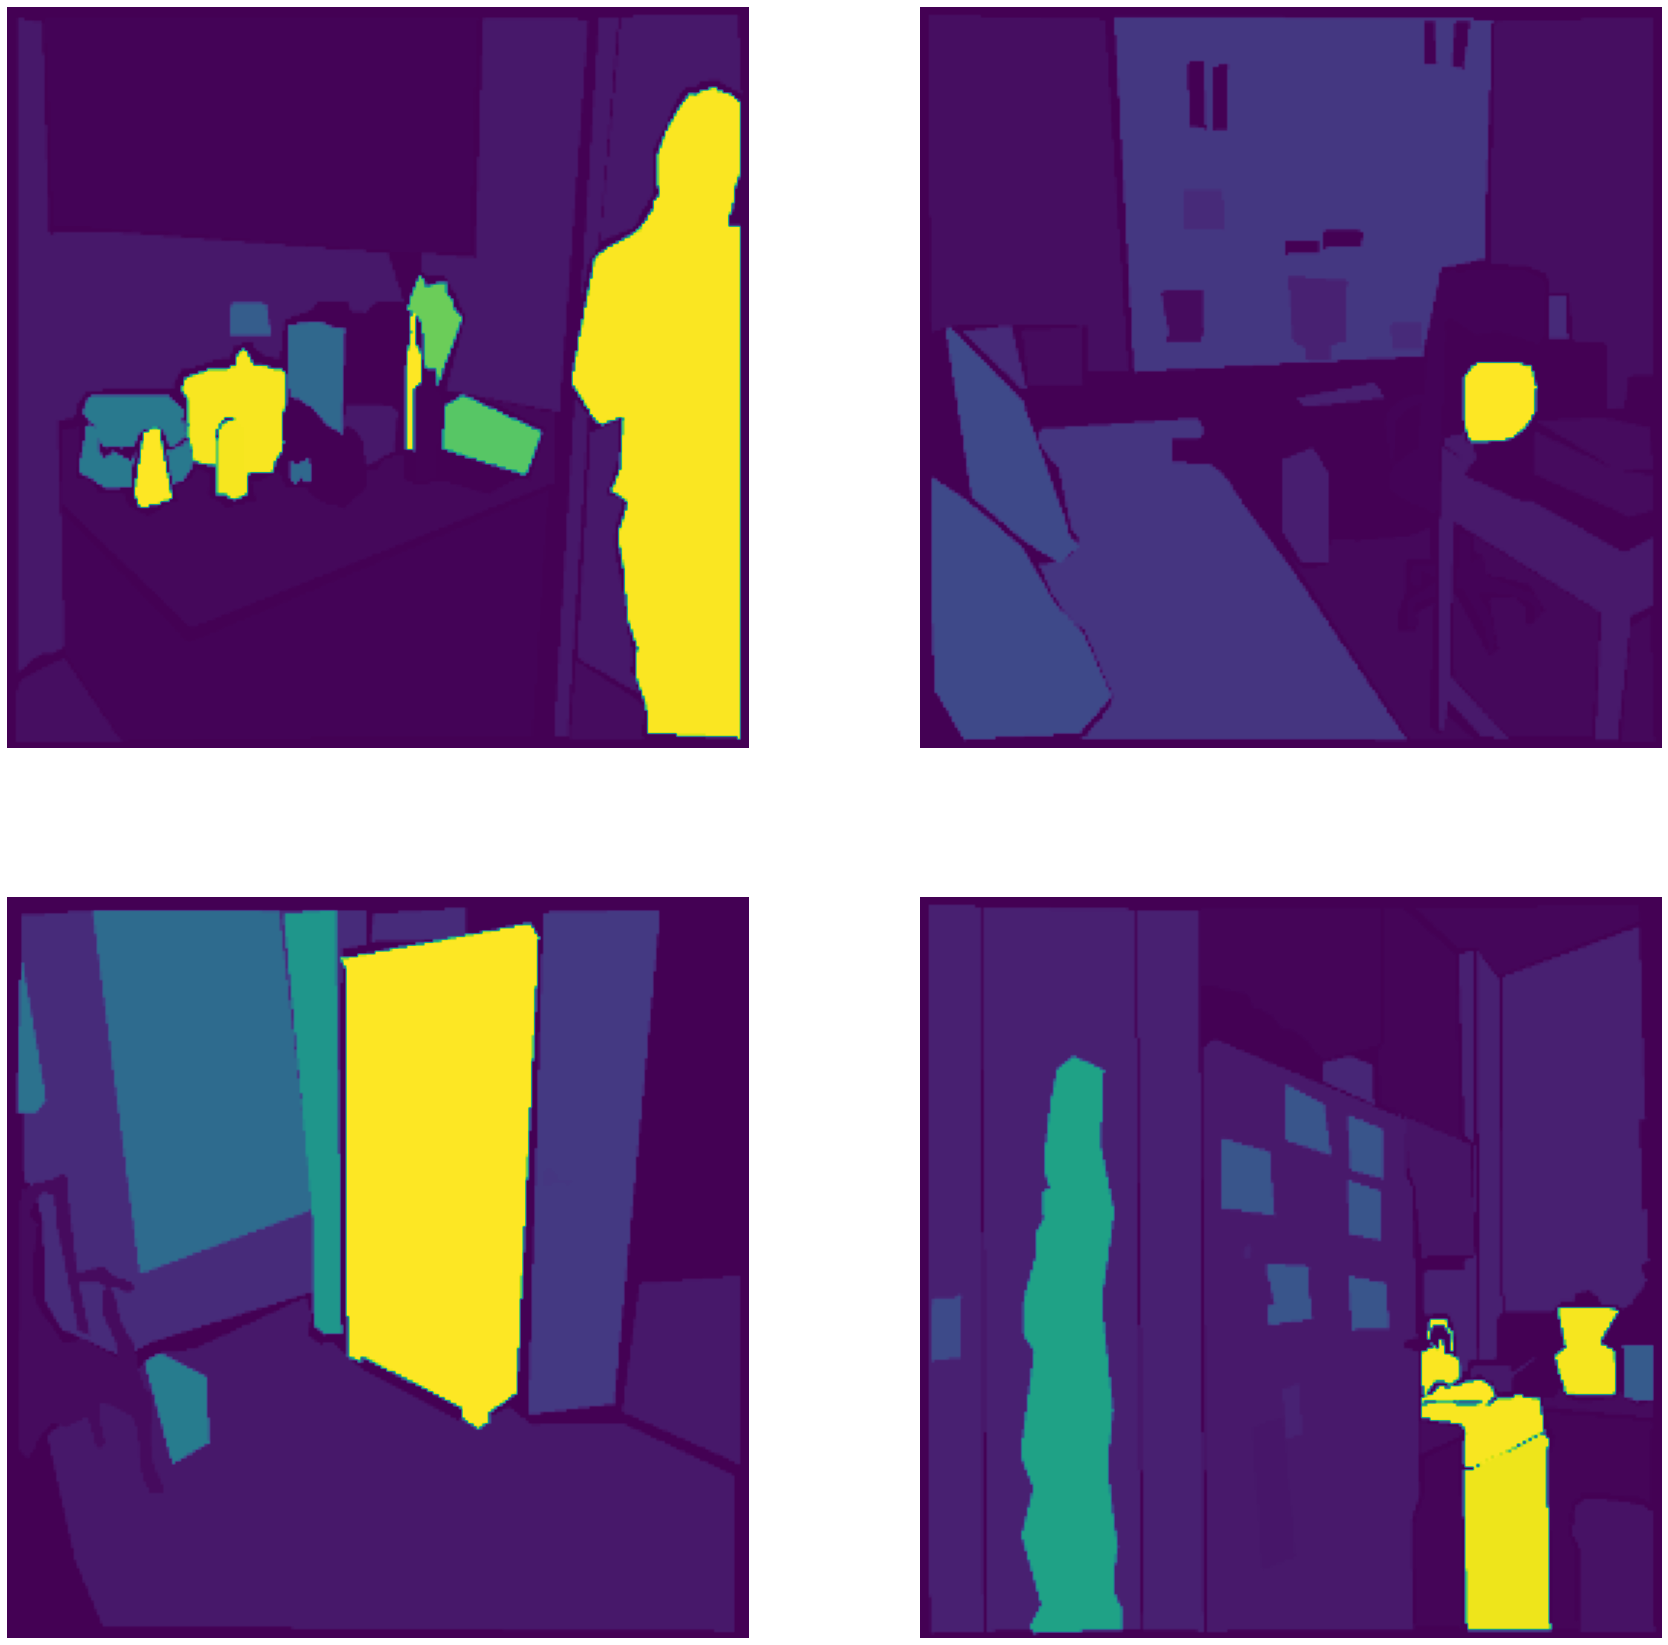

In [17]:
show_batch(image_batch[2][0], label_batch)

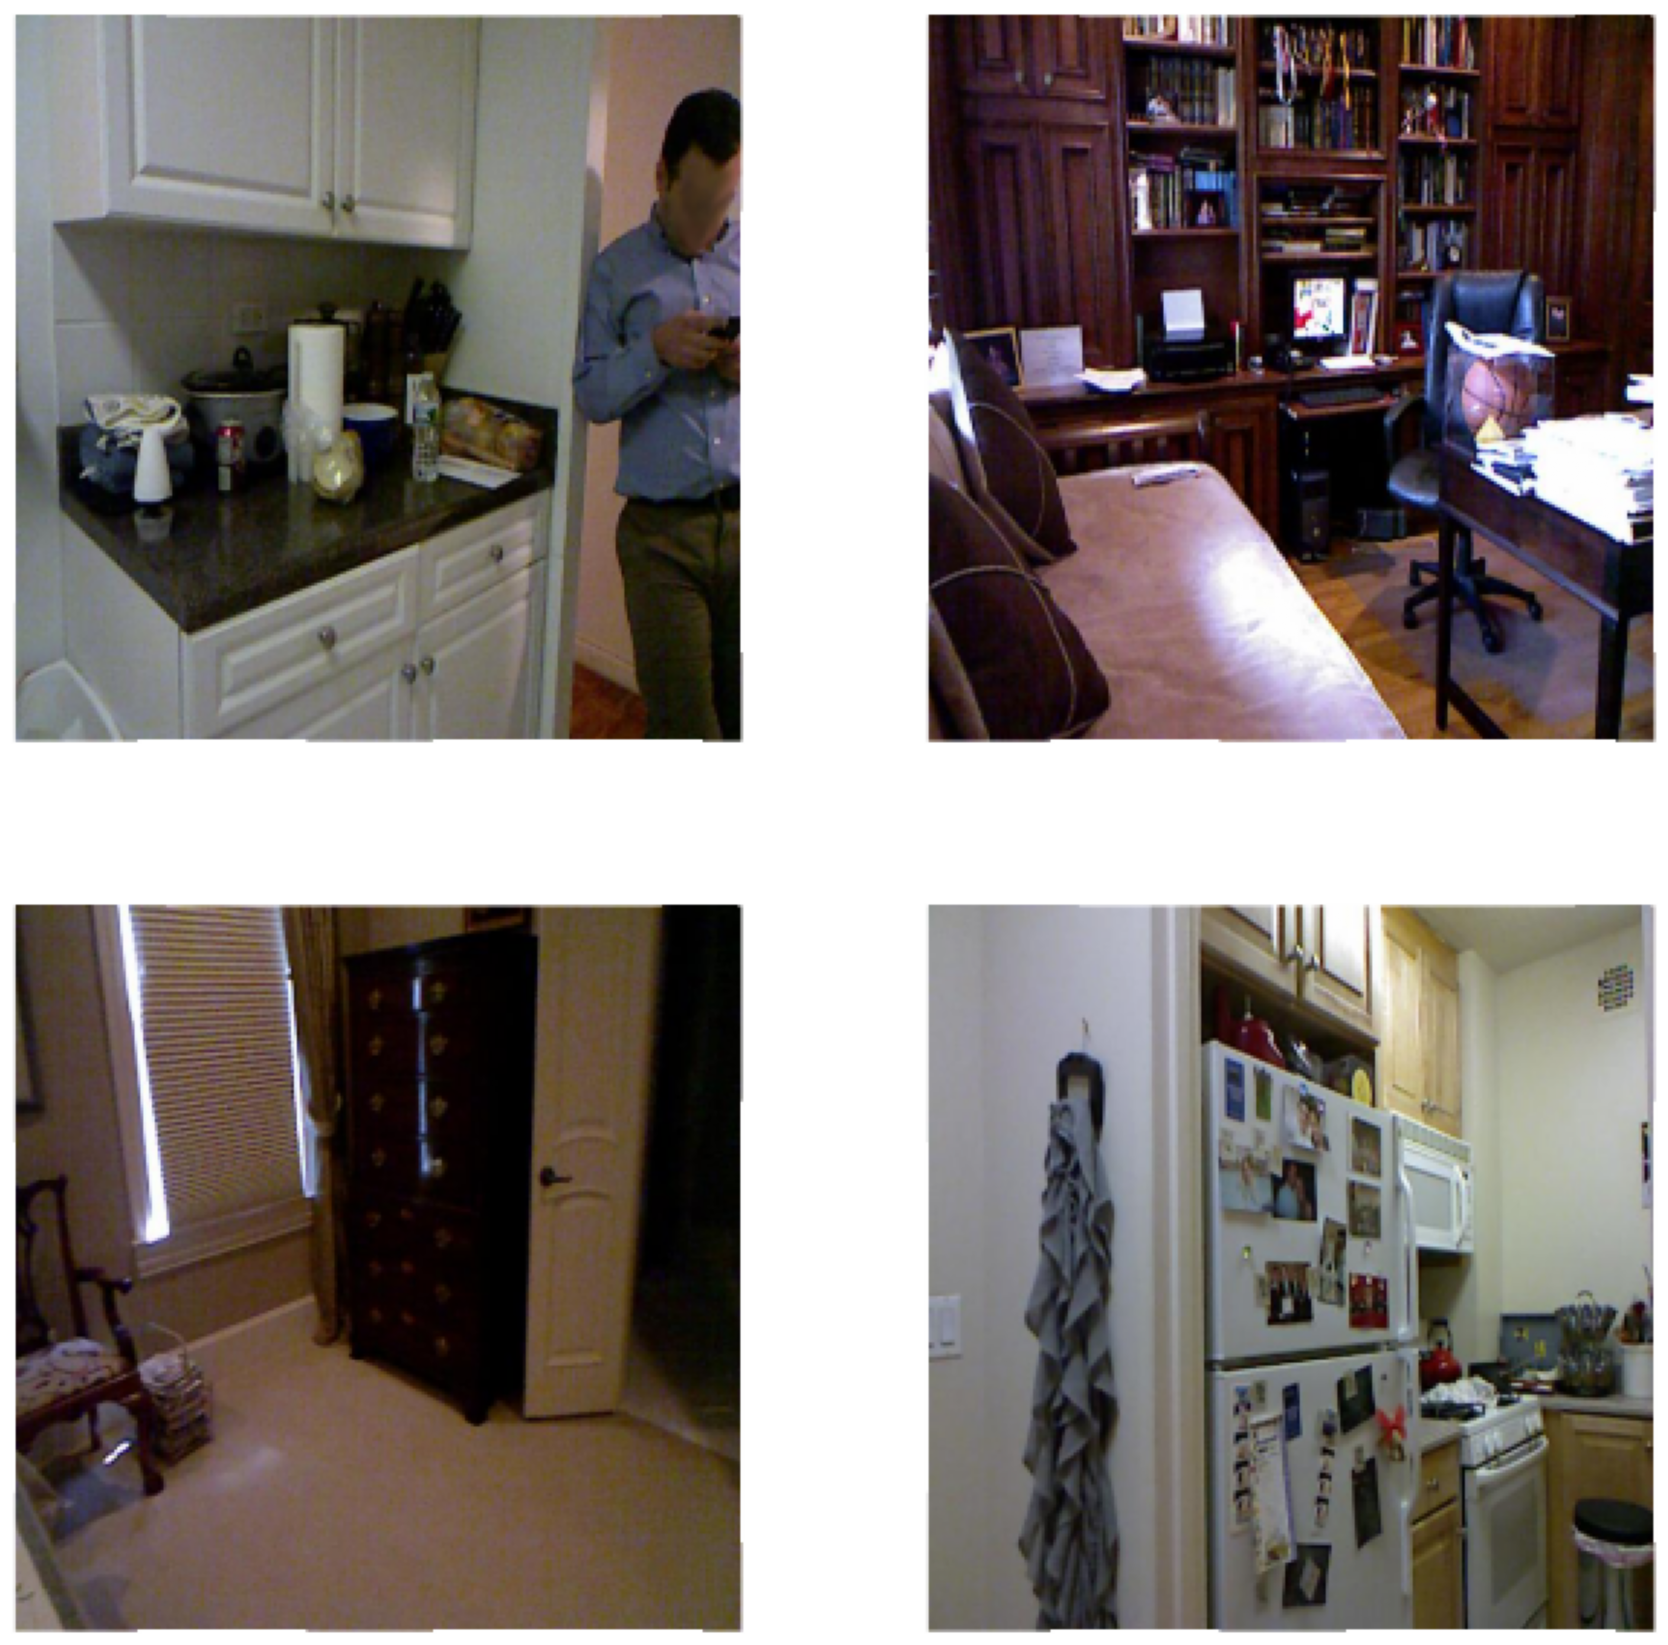

In [18]:
show_batch(image_batch[2][1], label_batch)

In [19]:
def build_discriminator(shape=512,
                        ndf=64, n_layers=3,
                        kernel_size=4, strides=2, activation='linear',
                        n_downsampling=1):
    
    img_a_input_512 = Input(shape=(512,512,1))
    img_b_input_512 = Input(shape=(512,512,3))

    img_a_input_256 = Input(shape=(256,256,1))
    img_b_input_256 = Input(shape=(256,256,3))


    img_a_input_128 = Input(shape=(128,128,1))
    img_b_input_128 = Input(shape=(128,128,3))

    img_a_input_64 = Input(shape=(64,64,1))
    img_b_input_64 = Input(shape=(64,64,3))
    
    if shape==512:
        input_a=img_a_input_512
        input_b=img_b_input_512
        
    
    if shape==256:
        input_a=img_a_input_256
        input_b=img_b_input_256
        
    
    if shape==128:
        input_a=img_a_input_128
        input_b=img_b_input_128
        
    
    if shape==64:
        input_a=img_a_input_64
        input_b=img_b_input_64

    features = []
    x = Concatenate(axis=-1)([input_a, input_b])
    for i in range(n_downsampling):
        x = AveragePooling2D(3, strides=2, padding='same')(x)

    x = Conv2D(ndf, kernel_size=kernel_size, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    features.append(x)

    nf = ndf
    for i in range(1, n_layers):
        nf = min(ndf * 2, 512)
        x = Conv2D(nf, kernel_size=kernel_size, strides=2, padding='same')(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.2)(x)
        features.append(x)

    nf = min(nf * 2, 512)
    x = Conv2D(nf, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    features.append(x)

    x = Conv2D(1, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = Activation(activation)(x)

    # create model graph
    model = Model(inputs=[img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, input_b], outputs=[x] + features)
    print("\nDiscriminator")
    model.summary()
    return model

In [20]:
discriminator_0=build_discriminator(shape=512,n_downsampling=0)

discriminator_1=build_discriminator(shape=256,n_downsampling=0)

discriminator_2=build_discriminator(shape=128,n_downsampling=0)

discriminator_3=build_discriminator(shape=64,n_downsampling=0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Discriminator
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 512, 512, 4)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
_______________________________________________________________________________________________


Discriminator
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 64, 64, 4)    0           input_31[0][0]                   
                                                                 input_32[0][0]                   
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 64)   4160        concatenate_

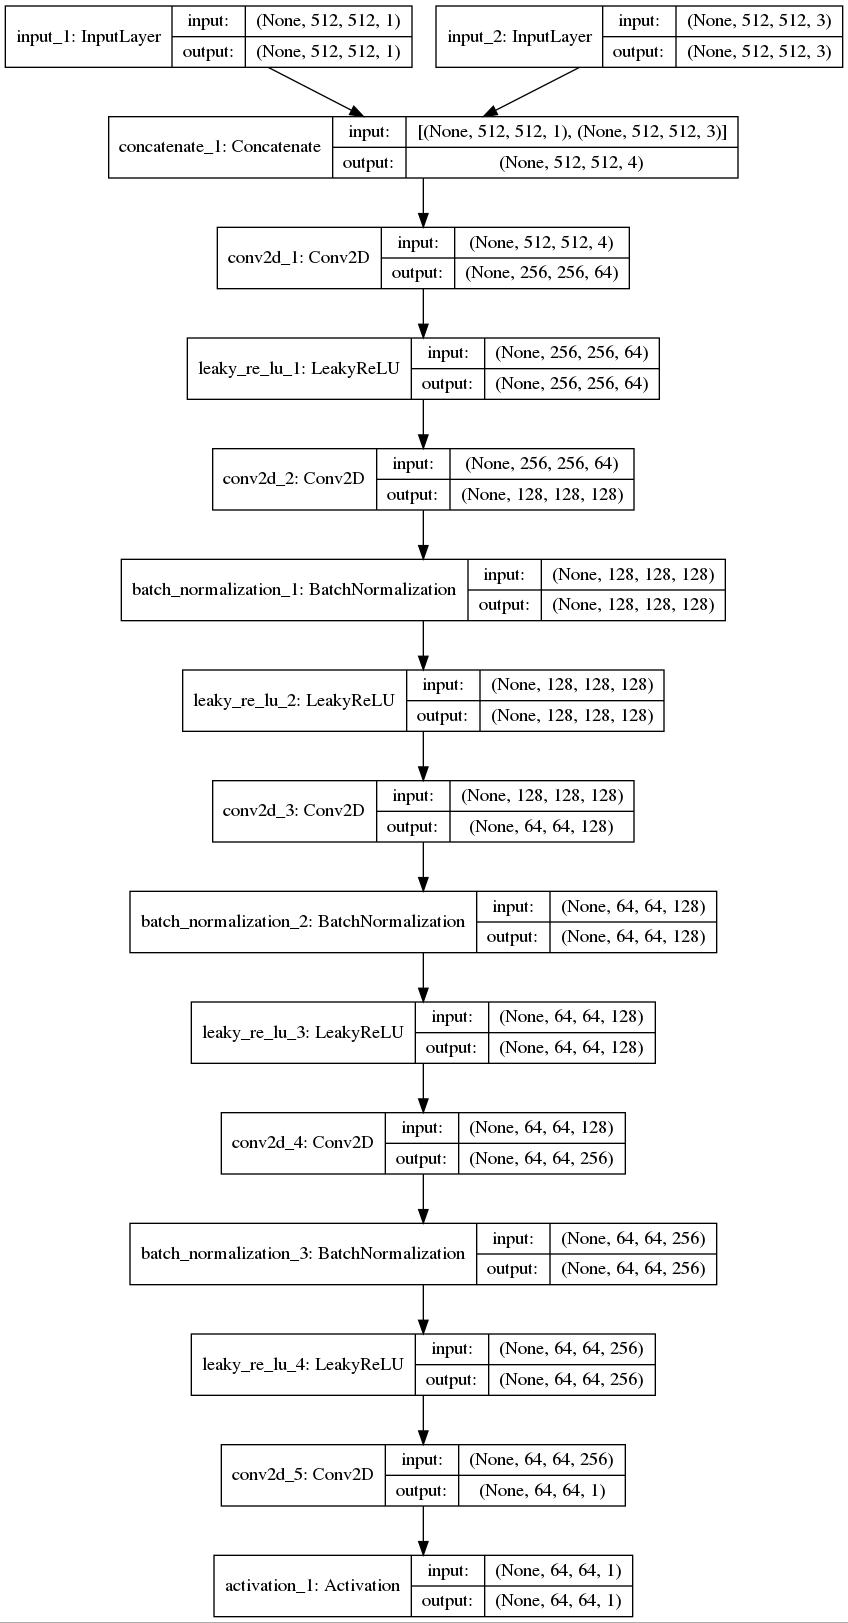

In [21]:
plot_model(discriminator_0, show_shapes=True, show_layer_names=True,to_file="discriminator_512.jpg")

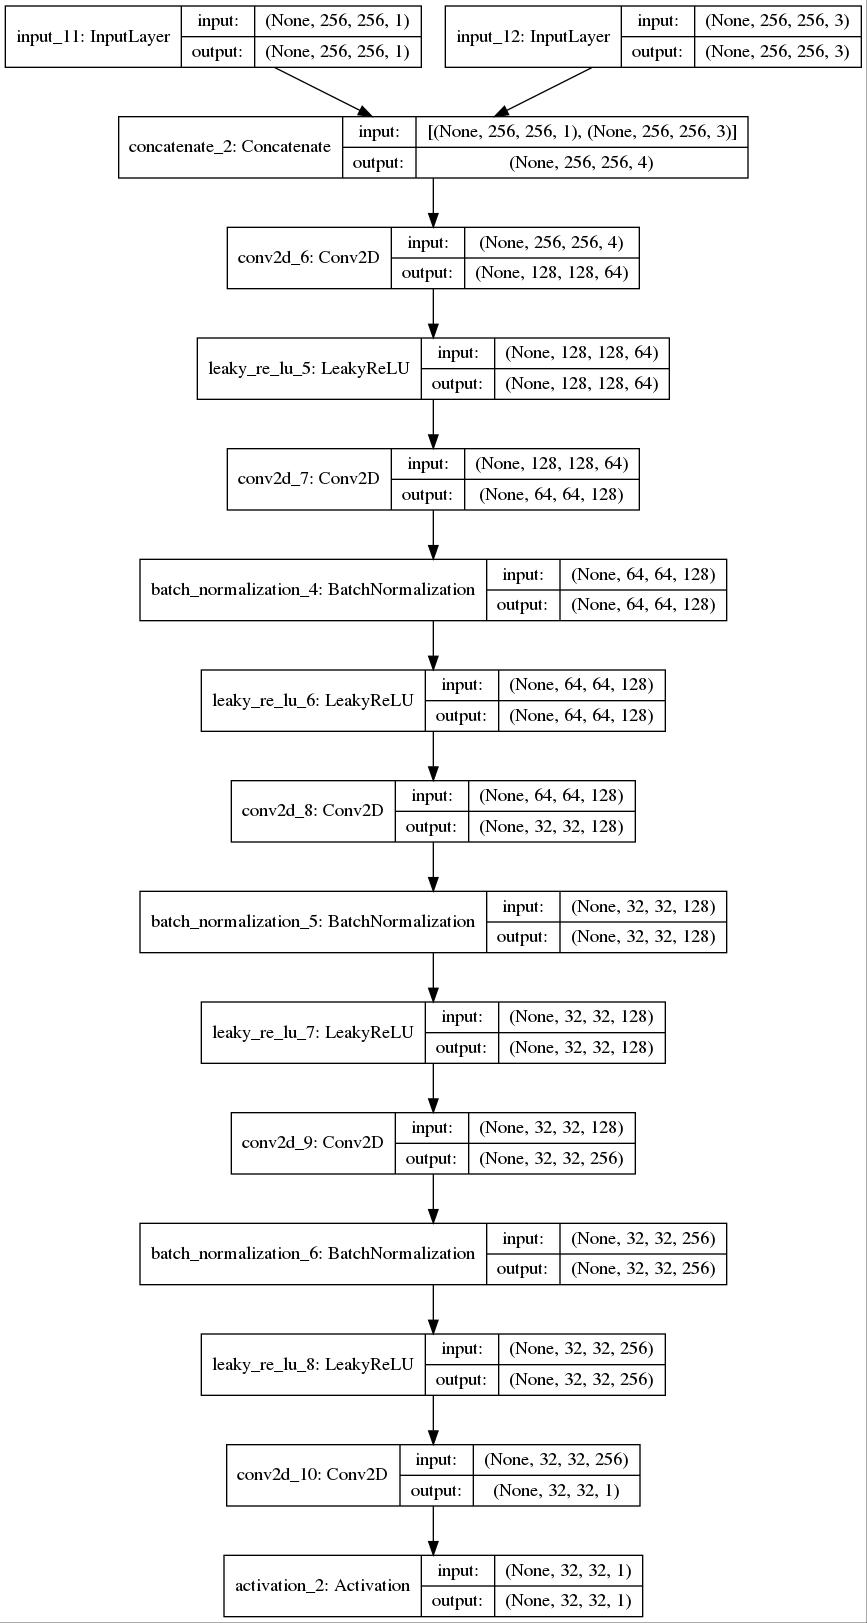

In [22]:
plot_model(discriminator_1, show_shapes=True, show_layer_names=True,to_file="discriminator_256.jpg")

In [23]:
# define an normal encoder block
def define_normal_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def normal_decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2D(n_filters, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g


# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g





# define the standalone generator model
def define_generator_1024(image_shape=(1024,1024,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
    
#.........................................512..........................

	image_shape_512 = (int(image_shape[0]/2),int(image_shape[1]/2),int(image_shape[2]))
    
	in_image_512 = Input(shape=image_shape_512) 
    
# #.................................

# 	e512_special = define_normal_encoder_block(in_image_512, 16)
#...........................
    #concatenate
        
	e_512_1=define_normal_encoder_block(in_image_512, 32)
	e_512_middle=define_normal_encoder_block(e_512_1,32)
	e_512_2=define_encoder_block(e_512_middle,32)   


#.........................................256..........................

	image_shape_256 = (int(image_shape[0]/4),int(image_shape[1]/4),int(image_shape[2]))
    
	in_image_256 = Input(shape=image_shape_256)
    
	e256_special = define_normal_encoder_block(in_image_256, 32)
    
# #...........................
#     #concatenate
    
	concatenate_512_256 = Concatenate()([e256_special,e_512_2])   
    
	e_256_1=define_normal_encoder_block(concatenate_512_256, 64)
	e_256_middle = define_normal_encoder_block(e_256_1,64)
	e_256_2=define_encoder_block(e_256_middle,64)  
    

    

#.............................................128...............
	image_shape_128 = (int(image_shape[0]/8),int(image_shape[1]/8),int(image_shape[2]))
    
	in_image_128 = Input(shape=image_shape_128)
    
	e128_special = define_normal_encoder_block(in_image_128, 64)
    
	concatenate_256_128 = Concatenate()([e128_special,e_256_2]) 

    
	e_128_1=define_normal_encoder_block(concatenate_256_128, 128)
	e_128_middle=define_normal_encoder_block(e_128_1, 128)
	e_128_2=define_encoder_block(e_128_middle,128)

    
#..............................................64..................
	image_shape_64 =(int(image_shape[0]/16),int(image_shape[1]/16),int(image_shape[2]))

	# image input
	in_image_64 = Input(shape=image_shape_64)
	# encoder model
	e1 = define_normal_encoder_block(in_image_64, 128, batchnorm=False)
#...........................
    #concatenate
    
	concatenate_128_64 = Concatenate()([e1,e_128_2])

#.............................
    
	e2 = define_normal_encoder_block(concatenate_128_64, 256)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 256, dropout=False)
 
	d7 = normal_decoder_block(d6, e1, 128, dropout=False)
# 	d_attention_128=Attention(256)(d7)
    
##....................64 output
	# output
	g = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
    
##...............................128 output

	d8 = decoder_block(d7, e_128_middle, 128, dropout=False)
	d9 = normal_decoder_block(d8, e_128_1, 128, dropout=False)
	d10 = normal_decoder_block(d9, e128_special, 64, dropout=False)
	# output
	# output

	g_128 = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d10)
	out_image_128 = Activation('tanh')(g_128)
    
# ##...............................256 output

	d11 = decoder_block(d10, e_256_middle, 64, dropout=False)
# 	d_attention_256=Attention(128)(d11)
	d12 = normal_decoder_block(d11, e_256_1, 64, dropout=False)
# 	# output
	g_256 = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d12)
	out_image_256 = Activation('tanh')(g_256)
    
####....................................512 output

	d13 = decoder_block(d12, e_512_middle, 32, dropout=False)
# 	d_attention_512=Attention(64)(d13)
	d14 = normal_decoder_block(d13, e_512_1, 32, dropout=False)
# 	# output
	g_512 = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d14)
	out_image_512 = Activation('tanh')(g_512)
    
	# define model
	model = Model([in_image_512,in_image_256,in_image_128,in_image_64], [out_image_512,out_image_256,out_image_128,out_image])
# 	model = multi_gpu_model(model, gpus=2)
	return model

In [24]:
g_model = define_generator_1024(image_shape=(1024,1024,1))

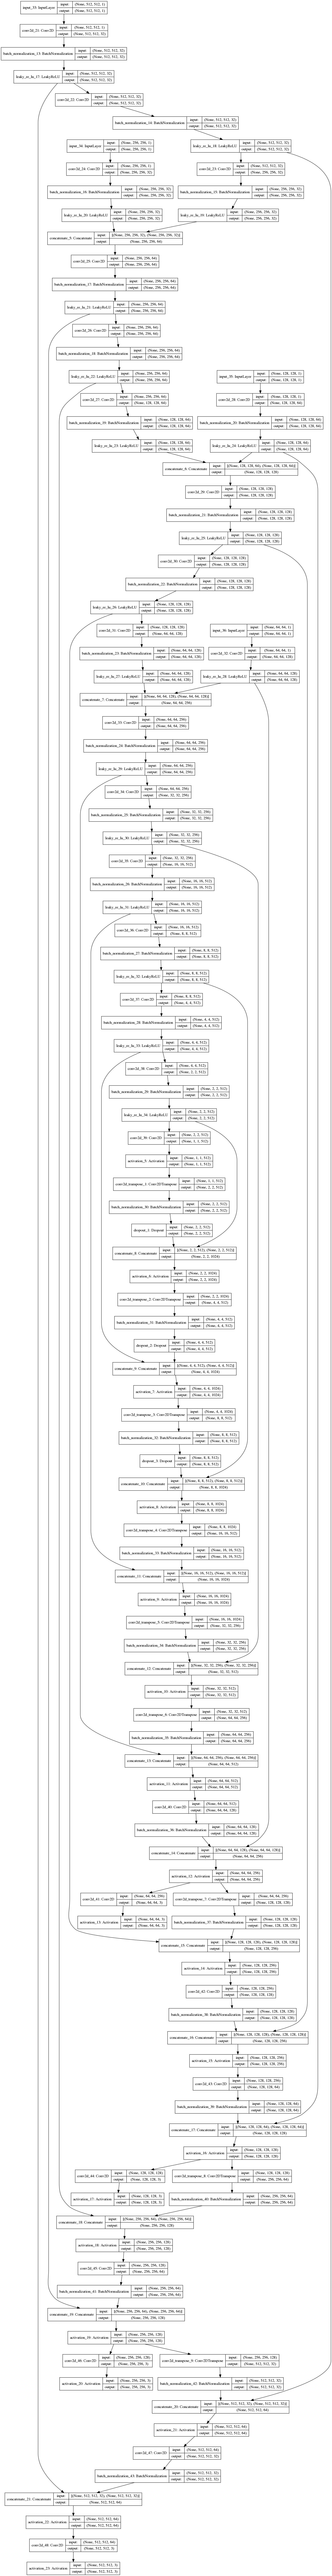

In [25]:
plot_model(g_model, show_shapes=True, show_layer_names=True,to_file="g_model_512.jpg")

In [26]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
# 	print(len(samples))    
	# create 'fake' class labels (0)
	y = zeros((len(samples), patch_shape, patch_shape*2,1))
	return X, y

In [27]:
import math
import cv2

from operator import itemgetter
# select real samples
def generate_real_samples_real(train_data_gen, n_samples,indices,size=64,patch_shape=16):
    # choose random instances
    
    ix = indices
    
    no_of_layers=int(math.log(size)/math.log(2))
    
#     print(no_of_layers)

    all_size_images=[]

  
    for j in range(6,no_of_layers+1):
    
        all_images=[]
#         all_labels=[]
        all_images_Y=[]

        
        
        for i in ix:

            
            Y=plt.imread(train_data_gen[i])
            
            Y=Y/np.max(Y)
            
            Y_k=cv2.resize(Y[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
            all_images_Y.append(Y_k)
            
############################################################################################

            X=  all_files["labels"][int(train_data_generator[i][24:-4])-1].transpose(1,0)
                         
                
            X_k=cv2.resize(X, dsize=(2**(j), 2**j))
            
#             X_k=mask2onehot(X_k,41)

            X_k=np.expand_dims(X_k,axis=-1)
    
            X_k=(X_k/894)
            
            all_images.append(X_k)
            

        
        
        all_images= np.array(all_images)
        
        all_images_Y = np.array(all_images_Y)
    
    
        all_images=(all_images-0.5)*2
        
        all_images_Y=(all_images_Y-0.5)*(2)
        
#         print(all_images.shape)
        
        all_images = [all_images,all_images_Y]
    
        all_size_images.append(all_images)
#     X=X/255
    # generate class labels
    y = np.ones((n_samples,patch_shape,patch_shape, 72))
    return all_size_images, y

In [28]:
generator=g_model

# discriminator_0.load_weights("./weapon1_discriminator_0.h5")
# discriminator_1.load_weights("./weapon1_discriminator_1.h5")
# discriminator_2.load_weights("./weapon1_discriminator_2.h5")
# discriminator_3.load_weights("./weapon1_discriminator_3.h5")
        
generator.load_weights("./weights/old_weights/model_000069.h5")

X_real_all , y_real = generate_real_samples_real(train_data_generator, 1,[1] , size=512,patch_shape=16)


X_real_64,X_real_128,X_real_256,X_real_512= tuple(X_real_all)

X_realA_512,X_realB_512 = tuple(X_real_512)
X_realA_256,X_realB_256 = tuple(X_real_256)
X_realA_128,X_realB_128 = tuple(X_real_128)
X_realA_64,X_realB_64 = tuple(X_real_64)
    
# out = generator.predict( [X_realA_512,X_realA_256,X_realA_128,X_realA_64]) 


listOfVariableTensors = generator.trainable_weights

outputTensor = generator.outputs

gradients = K.gradients(outputTensor, listOfVariableTensors)

# print("ok")

# import random

# # all_in=np.arange(0,len(train_data_generator),1)

    
# #     random.shuffle(train_data_generator)

# X_real_all , y_real = generate_real_samples_real(train_data_generator, 1,[j] , size=512,patch_shape=16)
    
# for j in range(0,len(train_data_generator)):
# #     # only D weights are trainable
# #     discriminator_0.trainable = True
# #     discriminator_1.trainable = True
# #     discriminator_2.trainable = True
# #     discriminator_3.trainable = True
# #     generator.trainable = False

#     # select a batch of real samples


# ##################################################################################


#     X_real_64,X_real_128,X_real_256,X_real_512= tuple(X_real_all)

#     X_realA_512,X_realB_512 = tuple(X_real_512)
#     X_realA_256,X_realB_256 = tuple(X_real_256)
#     X_realA_128,X_realB_128 = tuple(X_real_128)
#     X_realA_64,X_realB_64 = tuple(X_real_64)
    
#     X_fake, y_fake = generate_fake_samples(g_model, [X_realA_512,X_realA_256,X_realA_128,X_realA_64],16)    
    
#     X_fakeB_512,X_fakeB_256,X_fakeB_128,X_fakeB_64=tuple(X_fake)     

# 	# scale all pixels from [-1,1] to [0,1]


# 	# scale all pixels from [-1,1] to [0,1]
#     X_fakeB_512 = (X_fakeB_512 + 1) / 2.0

    
#     X_fakeB_256 = (X_fakeB_256 + 1) / 2.0
    
#     mpimg.imsave("./nyu_data/better_2/"+train_data_generator[j][24:],X_fakeB_256[0])
    
#     mpimg.imsave("./nyu_data/better_5/"+train_data_generator[j][24:],X_fakeB_512[0])
    
    

# #     print(train_data_generator[j][0][30:])



In [29]:
import tensorflow as tf 
import numpy as np

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
evaluated_gradients = sess.run(gradients,feed_dict={generator.inputs[0]:X_realA_512,generator.inputs[1]:X_realA_256,generator.inputs[2]:X_realA_128,generator.inputs[3]:X_realA_64})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [30]:
generator.inputs

[<tf.Tensor 'input_33:0' shape=(?, 512, 512, 1) dtype=float32>,
 <tf.Tensor 'input_34:0' shape=(?, 256, 256, 1) dtype=float32>,
 <tf.Tensor 'input_35:0' shape=(?, 128, 128, 1) dtype=float32>,
 <tf.Tensor 'input_36:0' shape=(?, 64, 64, 1) dtype=float32>]

In [31]:
# print(evaluated_gradients)

eval_single= np.squeeze(np.array(evaluated_gradients))

print(eval_single.shape)

(136,)


/home/ubuntu/Music/hope/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
evaluated_gradients[0].shape

print(np.squeeze(evaluated_gradients[0]).shape)

(4, 4, 32)


In [33]:
print(list(evaluated_gradients[0].reshape(evaluated_gradients[0].shape[0]*evaluated_gradients[0].shape[1]*evaluated_gradients[0].shape[2]*evaluated_gradients[0].shape[3])))

[-51641.812, 65393.08, 18960.906, -43816.957, 67449.08, -4681.805, -62913.82, 21949.918, -62973.312, -1619.0217, -41308.15, 26877.463, -76687.086, 80962.65, 17401.748, 27897.049, -53845.137, 19368.781, -14067.135, 133891.52, -9966.107, 27238.088, -1954.5956, 8128.542, 7608.573, -65364.918, 41318.707, -6323.3306, -70087.42, 94129.35, 39071.13, -51450.664, -55140.98, 66383.48, 13136.823, -42170.06, 71542.164, -4655.273, -58768.043, 25304.38, -60075.254, -778.625, -30659.48, 20831.42, -75165.53, 71642.234, 16986.086, 26385.752, -55551.97, 15256.429, -15121.763, 141780.6, -11414.1, 27635.594, 224.57153, 6925.19, -2447.5972, -64291.324, 38279.46, -9570.336, -67802.66, 97507.336, 37948.34, -50973.617, -62131.33, 77697.75, 6845.7085, -38856.98, 77361.6, -4768.1265, -47487.66, 21228.855, -62271.31, 2272.9463, -31477.99, 19157.27, -78686.61, 75636.36, 19989.96, 25168.201, -62387.598, 15526.611, -20156.217, 143822.61, -8544.298, 26274.555, 3981.1155, 6387.658, -6499.8564, -64420.586, 39301.38, -

In [34]:
all_gradients =[]


for gradients in evaluated_gradients:
    
    reshape_factor=1
    for shape_val in gradients.shape:
        reshape_factor=shape_val*reshape_factor
        
    all_gradients = all_gradients + list(gradients.reshape(reshape_factor))

In [35]:
len(all_gradients)

60410636

In [36]:
# !pip install seaborn

In [37]:
# import seaborn as sns

# sns.displot(all_gradients, x="value of gradient after 20  epochs")

Text(0.5, 0, 'value of gradients after 20 epochs including intermediate outputs')

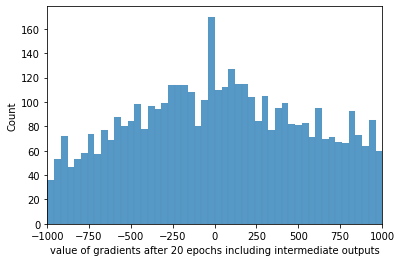

In [38]:
import seaborn as sns

sns.histplot(data=all_gradients[10000:20000], binwidth=40)
plt.xlim(-1000, 1000)
plt.xlabel('value of gradients after 20 epochs including intermediate outputs')

In [47]:
generator=g_model

# discriminator_0.load_weights("./weapon1_discriminator_0.h5")
# discriminator_1.load_weights("./weapon1_discriminator_1.h5")
# discriminator_2.load_weights("./weapon1_discriminator_2.h5")
# discriminator_3.load_weights("./weapon1_discriminator_3.h5")
        
generator.load_weights("./weights/old_weights/model_000300.h5")

X_real_all , y_real = generate_real_samples_real(train_data_generator, 1,[1] , size=512,patch_shape=16)


X_real_64,X_real_128,X_real_256,X_real_512= tuple(X_real_all)

X_realA_512,X_realB_512 = tuple(X_real_512)
X_realA_256,X_realB_256 = tuple(X_real_256)
X_realA_128,X_realB_128 = tuple(X_real_128)
X_realA_64,X_realB_64 = tuple(X_real_64)
    
# out = generator.predict( [X_realA_512,X_realA_256,X_realA_128,X_realA_64]) 


listOfVariableTensors = generator.trainable_weights

outputTensor = generator.outputs

gradients = K.gradients(outputTensor, listOfVariableTensors)



In [48]:
import tensorflow as tf 
import numpy as np

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
evaluated_gradients = sess.run(gradients,feed_dict={generator.inputs[0]:X_realA_512,generator.inputs[1]:X_realA_256,generator.inputs[2]:X_realA_128,generator.inputs[3]:X_realA_64})

In [43]:
all_gradients_final =[]


for gradients in evaluated_gradients:
    
    reshape_factor=1
    for shape_val in gradients.shape:
        reshape_factor=shape_val*reshape_factor
        
    all_gradients_final = all_gradients_final + list(gradients.reshape(reshape_factor))

(-1000.0, 1000.0)

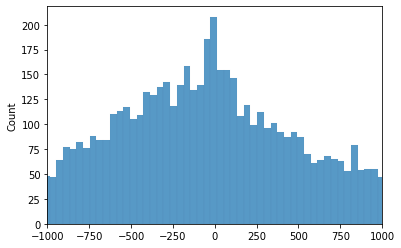

In [44]:
import seaborn as sns

sns.histplot(data=all_gradients_final[10000:20000], binwidth=40)
plt.xlim(-1000, 1000)